<a href="https://colab.research.google.com/github/swiryat/Alice-skill/blob/master/kaggle_eda_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='green' size='7'>**консультация 05 04 25**</font>  
<font color='#11a642' size='6'>**EDA**</font>  
<font size='5'>**Задание:**</font>  

Домашняя работа основана на данных конкурса https://www.kaggle.com/competitions/playground-series-s5e4

Что нужно сделать:

1. Загрузить данные c конкурса  https://www.kaggle.com/competitions/playground-series-s5e4.
2. Проведисти разведочный анализ данных (EDA)  
3. Построить деревья решений
4. Опционально. Загрузите решение на kaggle





# <font color='#11a642' size='6'> **Импорт и установка библиотек**

In [ ]:
from google.colab import drive
import json
import zipfile

import pandas as pd

# <font color='#11a642' size='6'> **Загрузка данных**

In [ ]:
def load_dataset(from_kaggle:bool = False) -> pd.DataFrame:
  '''
  Функция скачивает данные с сайта kaggle, если установлен from_kaggle=True,
  инчае архив считывается по ссылке с гугл диска (такой способ удобен тем, у кого нет доступа к kaggle)
  params:
      - from_kaggle - индикатор откуда скачивать данные (True - c сайта kaggle, False -  c google диска)
  return:
      - pd.DataFrame

  '''
  if from_kaggle:
    # запросит разрешение к гугл диску, необходимо дать это разрешение
    drive.mount('/content/drive')
    # установим kaggle
    !pip install kaggle -q
    !mkdir ~/.kaggle
    # копируем kaggle.json (предварительно, необходимо сгенерить токен на
    # сайте kaggle и сохранить к себе на гугл диск) в папку ~/.kaggle/
    !cp "/content/drive/MyDrive/Colab Notebooks/config/kaggle.json" ~/.kaggle/
    !kaggle competitions download -c playground-series-s5e5
  else:
    !gdown 1PIGq3TXLKuRUDQHe_n-rqhosVfPzY-j9
  # распаковка архива
  zip_ref = zipfile.ZipFile('playground-series-s5e5.zip', 'r')
  zip_ref.extractall()
  zip_ref.close()
  df_train = pd.read_csv('train.csv')
  df_test = pd.read_csv('test.csv')
  df_sample_submission = pd.read_csv('sample_submission.csv')
  return df_train, df_test, df_sample_submission

In [ ]:
ls

__pycache__/  sample_data/  test.py


In [ ]:
from test import var

In [ ]:
var

12334

In [ ]:
pwd

'/content'

In [ ]:
/content/test/example.py

In [ ]:
# cp /content/playground-series-s5e5.zip

In [ ]:
df_train, df_test, df_sample_submission = load_dataset(from_kaggle=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mkdir: cannot create directory ‘/root/.kaggle’: File exists
playground-series-s5e5.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# на этих данных дальше необходимо разработать модель
df_train.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [ ]:
df_train.shape

(750000, 9)

In [ ]:
df_train.isna().sum()

,0
id,0
Sex,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,750000.0,374999.500000,216506.495284,0.0,187499.75,374999.5,562499.25,749999.0
Age,750000.0,41.420404,15.175049,20.0,28.00,40.0,52.00,79.0
Height,750000.0,174.697685,12.824496,126.0,164.00,174.0,185.00,222.0
Weight,750000.0,75.145668,13.982704,36.0,63.00,74.0,87.00,132.0
Duration,750000.0,15.421015,8.354095,1.0,8.00,15.0,23.00,30.0
Heart_Rate,750000.0,95.483995,9.449845,67.0,88.00,95.0,103.00,128.0
Body_Temp,750000.0,40.036253,0.779875,37.1,39.60,40.3,40.70,41.5
Calories,750000.0,88.282781,62.395349,1.0,34.00,77.0,136.00,314.0


In [ ]:
df_train[df_train['Weight'] < 40]

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
50273,50273,female,45,153.0,37.0,18.0,96.0,40.7,98.0
251672,251672,female,28,156.0,39.0,16.0,99.0,40.4,83.0
649233,649233,female,24,163.0,36.0,15.0,101.0,40.3,89.0


In [ ]:
df_train.describe(include='all')

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,375721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,374999.500000,NaN,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,NaN,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,NaN,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,NaN,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,NaN,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,NaN,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000


In [ ]:
df_train.select_dtypes(include='object').describe()

,Sex
count,750000
unique,2
top,female
freq,375721


In [ ]:
# dropna()


<Axes: >

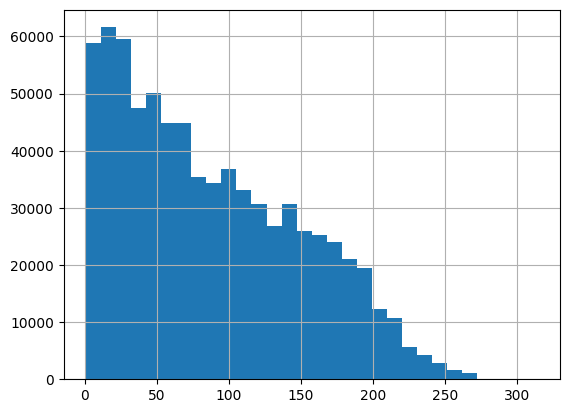

In [ ]:
df_train['Calories'].hist(bins=30)

In [ ]:
df_train.groupby('Sex',as_index=False).agg({'Calories':['min', 'mean', 'max']})

Sex Calories                  
               min       mean    max
0  female      1.0  87.534761  300.0
1    male      1.0  89.033683  314.0

<Axes: xlabel='Weight', ylabel='Calories'>

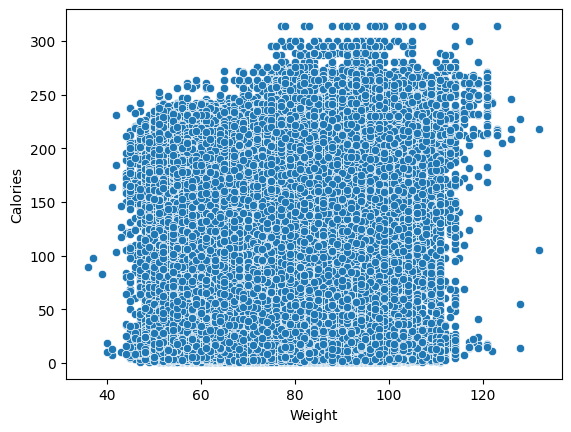

In [ ]:
import seaborn as sns
sns.scatterplot(df_train, x = 'Weight', y='Calories')

<Axes: xlabel='Weight', ylabel='Calories'>

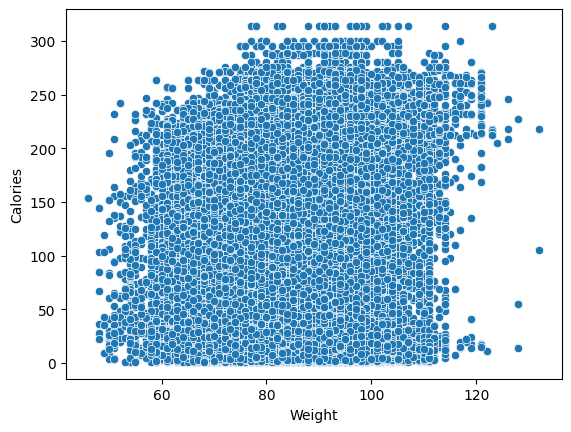

In [ ]:
sns.scatterplot(df_train[df_train['Sex']=='male'], x = 'Weight', y='Calories')

<Axes: xlabel='Weight', ylabel='Calories'>

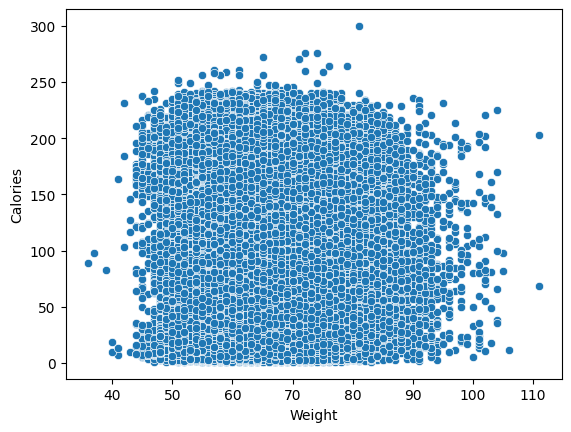

In [ ]:
sns.scatterplot(df_train[df_train['Sex']=='female'], x = 'Weight', y='Calories')

In [ ]:
df_train.columns

Index(['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [ ]:
df_train.columns = df_train.columns.str.lower()

In [ ]:
df_train.head()

,id,sex,age,height,weight,duration,heart_rate,body_temp,calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [ ]:
# определим роли
id = 'id'
target = 'calories'
features_num = [col for col in df_train.select_dtypes(include='number').columns if col not in [id, target]]
features_num


['age', 'height', 'weight', 'duration', 'heart_rate', 'body_temp']

In [ ]:
features_cat = [col for col in df_train.select_dtypes(exclude='number').columns if col not in [id, target]]
features_cat

['sex']

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   sex         750000 non-null  object 
 2   age         750000 non-null  int64  
 3   height      750000 non-null  float64
 4   weight      750000 non-null  float64
 5   duration    750000 non-null  float64
 6   heart_rate  750000 non-null  float64
 7   body_temp   750000 non-null  float64
 8   calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [ ]:
df_train.describe()

,id,age,height,weight,duration,heart_rate,body_temp,calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [ ]:
df_train.select_dtypes(include='object').describe()

,sex
count,750000
unique,2
top,female
freq,375721
